In [195]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [196]:
train = pd.read_excel('flight_train.xlsx')

In [197]:
test = pd.read_excel('flight_test.xlsx')

In [198]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [199]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [200]:
train.shape

(10683, 11)

In [201]:
test.shape

(2671, 10)

In [202]:
df = pd.concat([train,test])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [203]:
df

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops
0,No info,IndiGo,01:10 22 Mar,24/03/2019,22:20,New Delhi,2h 50m,3897.0,BLR → DEL,Banglore,non-stop
1,No info,Air India,13:15,1/05/2019,05:50,Banglore,7h 25m,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops
2,No info,Jet Airways,04:25 10 Jun,9/06/2019,09:25,Cochin,19h,13882.0,DEL → LKO → BOM → COK,Delhi,2 stops
3,No info,IndiGo,23:30,12/05/2019,18:05,Banglore,5h 25m,6218.0,CCU → NAG → BLR,Kolkata,1 stop
4,No info,IndiGo,21:35,01/03/2019,16:50,New Delhi,4h 45m,13302.0,BLR → NAG → DEL,Banglore,1 stop
5,No info,SpiceJet,11:25,24/06/2019,09:00,Banglore,2h 25m,3873.0,CCU → BLR,Kolkata,non-stop
6,In-flight meal not included,Jet Airways,10:25 13 Mar,12/03/2019,18:55,New Delhi,15h 30m,11087.0,BLR → BOM → DEL,Banglore,1 stop
7,No info,Jet Airways,05:05 02 Mar,01/03/2019,08:00,New Delhi,21h 5m,22270.0,BLR → BOM → DEL,Banglore,1 stop
8,In-flight meal not included,Jet Airways,10:25 13 Mar,12/03/2019,08:55,New Delhi,25h 30m,11087.0,BLR → BOM → DEL,Banglore,1 stop
9,No info,Multiple carriers,19:15,27/05/2019,11:25,Cochin,7h 50m,8625.0,DEL → BOM → COK,Delhi,1 stop


In [204]:
df.isnull().sum()

Additional_Info       0
Airline               0
Arrival_Time          0
Date_of_Journey       0
Dep_Time              0
Destination           0
Duration              0
Price              2671
Route                 1
Source                0
Total_Stops           1
dtype: int64

In [205]:
#As we can see there is a null value in route and total stop
for columns in ['Route', 'Total_Stops']:
    df[columns].fillna(df[columns].mode()[0], inplace=True)

In [206]:
df.isnull().sum()

Additional_Info       0
Airline               0
Arrival_Time          0
Date_of_Journey       0
Dep_Time              0
Destination           0
Duration              0
Price              2671
Route                 0
Source                0
Total_Stops           0
dtype: int64

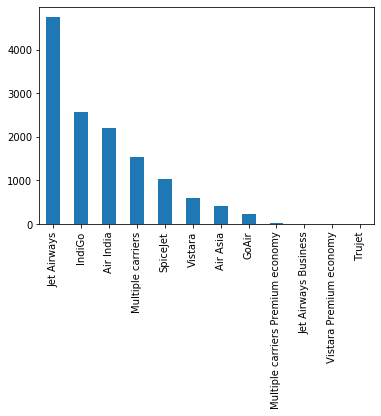

In [207]:
pd.value_counts(df['Airline']).plot.bar()

In [208]:
#performing feature engineering
#extracting the month from the flight date
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df['Month_of_Journey'] = df['Date_of_Journey'].dt.month
df['Day_of_Journey'] = df['Date_of_Journey'].dt.day
df["Day_of_Week"] =  df["Date_of_Journey"].dt.day_name()

In [209]:
df.head()

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops,Month_of_Journey,Day_of_Journey,Day_of_Week
0,No info,IndiGo,01:10 22 Mar,2019-03-24,22:20,New Delhi,2h 50m,3897.0,BLR → DEL,Banglore,non-stop,3,24,Sunday
1,No info,Air India,13:15,2019-01-05,05:50,Banglore,7h 25m,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops,1,5,Saturday
2,No info,Jet Airways,04:25 10 Jun,2019-09-06,09:25,Cochin,19h,13882.0,DEL → LKO → BOM → COK,Delhi,2 stops,9,6,Friday
3,No info,IndiGo,23:30,2019-12-05,18:05,Banglore,5h 25m,6218.0,CCU → NAG → BLR,Kolkata,1 stop,12,5,Thursday
4,No info,IndiGo,21:35,2019-01-03,16:50,New Delhi,4h 45m,13302.0,BLR → NAG → DEL,Banglore,1 stop,1,3,Thursday


In [210]:
duration = list(df['Duration'])

for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())

dur_hours = []
dur_minutes = []  

for i in range(len(duration)) :
    dur_hours.append(int(duration[i].split()[0][:-1]))
    dur_minutes.append(int(duration[i].split()[1][:-1]))
    
df['Duration_hours'] = dur_hours
df['Duration_minutes'] =dur_minutes

In [211]:
df.head()

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops,Month_of_Journey,Day_of_Journey,Day_of_Week,Duration_hours,Duration_minutes
0,No info,IndiGo,01:10 22 Mar,2019-03-24,22:20,New Delhi,2h 50m,3897.0,BLR → DEL,Banglore,non-stop,3,24,Sunday,2,50
1,No info,Air India,13:15,2019-01-05,05:50,Banglore,7h 25m,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops,1,5,Saturday,7,25
2,No info,Jet Airways,04:25 10 Jun,2019-09-06,09:25,Cochin,19h,13882.0,DEL → LKO → BOM → COK,Delhi,2 stops,9,6,Friday,19,0
3,No info,IndiGo,23:30,2019-12-05,18:05,Banglore,5h 25m,6218.0,CCU → NAG → BLR,Kolkata,1 stop,12,5,Thursday,5,25
4,No info,IndiGo,21:35,2019-01-03,16:50,New Delhi,4h 45m,13302.0,BLR → NAG → DEL,Banglore,1 stop,1,3,Thursday,4,45


In [212]:
df.drop(['Duration'], axis = 1,inplace=True) 

In [213]:
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
df['Dep_Time_hours'] = df['Dep_Time'].dt.hour
df['Dep_Time_minutes'] = df['Dep_Time'].dt.minute

In [214]:
df.drop(['Dep_Time'], axis = 1,inplace=True)

In [215]:
df.head()

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Destination,Price,Route,Source,Total_Stops,Month_of_Journey,Day_of_Journey,Day_of_Week,Duration_hours,Duration_minutes,Dep_Time_hours,Dep_Time_minutes
0,No info,IndiGo,01:10 22 Mar,2019-03-24,New Delhi,3897.0,BLR → DEL,Banglore,non-stop,3,24,Sunday,2,50,22,20
1,No info,Air India,13:15,2019-01-05,Banglore,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops,1,5,Saturday,7,25,5,50
2,No info,Jet Airways,04:25 10 Jun,2019-09-06,Cochin,13882.0,DEL → LKO → BOM → COK,Delhi,2 stops,9,6,Friday,19,0,9,25
3,No info,IndiGo,23:30,2019-12-05,Banglore,6218.0,CCU → NAG → BLR,Kolkata,1 stop,12,5,Thursday,5,25,18,5
4,No info,IndiGo,21:35,2019-01-03,New Delhi,13302.0,BLR → NAG → DEL,Banglore,1 stop,1,3,Thursday,4,45,16,50


In [216]:
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])
df['Arr_Time_hours'] = df['Arrival_Time'].dt.hour
df['Arr_Time_minutes'] = df['Arrival_Time'].dt.minute

In [217]:
df.drop(['Arrival_Time'], axis = 1,inplace=True)

In [218]:
df['Total_Stops']=df['Total_Stops'].fillna('1 stop')

In [219]:
df['Total_Stops']=df['Total_Stops'].replace('non-stop','0 stop')

In [220]:
df['Stop'] = df['Total_Stops'].str.split(' ').str[0]


In [221]:
df['Stop'] = df['Stop'].astype(int)


In [222]:
df=df.drop(['Total_Stops'], axis=1)

In [223]:
df=df.drop(['Date_of_Journey'], axis=1)

In [224]:
df.head()

,Additional_Info,Airline,Destination,Price,Route,Source,Month_of_Journey,Day_of_Journey,Day_of_Week,Duration_hours,Duration_minutes,Dep_Time_hours,Dep_Time_minutes,Arr_Time_hours,Arr_Time_minutes,Stop
0,No info,IndiGo,New Delhi,3897.0,BLR → DEL,Banglore,3,24,Sunday,2,50,22,20,1,10,0
1,No info,Air India,Banglore,7662.0,CCU → IXR → BBI → BLR,Kolkata,1,5,Saturday,7,25,5,50,13,15,2
2,No info,Jet Airways,Cochin,13882.0,DEL → LKO → BOM → COK,Delhi,9,6,Friday,19,0,9,25,4,25,2
3,No info,IndiGo,Banglore,6218.0,CCU → NAG → BLR,Kolkata,12,5,Thursday,5,25,18,5,23,30,1
4,No info,IndiGo,New Delhi,13302.0,BLR → NAG → DEL,Banglore,1,3,Thursday,4,45,16,50,21,35,1


In [225]:
df_test.head()

,Additional_Info,Airline,Destination,Route,Source,Month_of_Journey,Day_of_Journey,Day_of_Week,Duration_hours,Duration_minutes,Dep_Time_hours,Dep_Time_minutes,Arr_Time_hours,Arr_Time_minutes,Stop
0,8,4,1,108,2,6,6,4,10,55,17,30,4,25,1
1,8,3,0,94,3,12,5,4,4,0,6,20,10,20,1
2,5,4,1,108,2,5,21,5,23,45,19,15,19,0,1
3,8,6,1,108,2,5,21,5,13,0,8,0,21,0,1
4,8,0,2,18,0,6,24,1,2,50,23,55,2,45,0


In [226]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Additional_Info"] = le.fit_transform(df["Additional_Info"])
df["Airline"] = le.fit_transform(df["Airline"])
df["Destination"] = le.fit_transform(df["Destination"])
df["Source"] = le.fit_transform(df["Source"])
df['Route']= le.fit_transform(df["Route"])
df['Day_of_Week']= le.fit_transform(df["Day_of_Week"])


In [227]:
df_train=df.iloc[:10683,:]
df_test=df.iloc[10683:,:]

In [228]:
df_test.drop('Price', axis=1, inplace=True)

In [229]:
df_train['Price'] = np.log1p(df_train['Price'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [230]:
df_train.head()

,Additional_Info,Airline,Destination,Price,Route,Source,Month_of_Journey,Day_of_Journey,Day_of_Week,Duration_hours,Duration_minutes,Dep_Time_hours,Dep_Time_minutes,Arr_Time_hours,Arr_Time_minutes,Stop
0,8,3,5,8.268219,18,0,3,24,3,2,50,22,20,1,10,0
1,8,1,0,8.944159,87,3,1,5,2,7,25,5,50,13,15,2
2,8,4,1,9.538420,122,2,9,6,0,19,0,9,25,4,25,2
3,8,3,0,8.735364,95,3,12,5,4,5,25,18,5,23,30,1
4,8,3,5,9.495745,29,0,1,3,4,4,45,16,50,21,35,1


In [231]:
df_test.head()

,Additional_Info,Airline,Destination,Route,Source,Month_of_Journey,Day_of_Journey,Day_of_Week,Duration_hours,Duration_minutes,Dep_Time_hours,Dep_Time_minutes,Arr_Time_hours,Arr_Time_minutes,Stop
0,8,4,1,108,2,6,6,4,10,55,17,30,4,25,1
1,8,3,0,94,3,12,5,4,4,0,6,20,10,20,1
2,5,4,1,108,2,5,21,5,23,45,19,15,19,0,1
3,8,6,1,108,2,5,21,5,13,0,8,0,21,0,1
4,8,0,2,18,0,6,24,1,2,50,23,55,2,45,0


In [232]:
df_train.shape,df_test.shape

((10683, 16), (2671, 15))

In [233]:
X = df_train.drop(labels=['Price'], axis=1)
y = df_train['Price']


In [234]:
from sklearn.linear_model import LinearRegression,ElasticNet,Lasso,Ridge,BayesianRidge
from lightgbm.sklearn import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor,BaggingRegressor,VotingClassifier
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn import svm

from sklearn.model_selection import KFold,train_test_split
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [235]:
def RMSE(estimator,X_train, Y_train, cv,n_jobs=-1):
    cv_results = cross_val_score(estimator,X_train,Y_train,cv=cv,scoring="neg_mean_squared_error",n_jobs=n_jobs)
    return (np.sqrt(-cv_results)).mean()

In [236]:
def baseModels(train_X,train_y):
    model_EN=ElasticNet(random_state=0)
    model_SVR=svm.SVR(kernel='rbf',C=0.005)
    model_Lasso=Lasso(alpha=0.1,max_iter=1000)
    model_Ridge=Ridge(alpha=0.1)
    model_Linear=LinearRegression()
    model_LGBM=LGBMRegressor(boosting='gbdt', n_jobs=-1, random_state=2018)
    model_GBR=GradientBoostingRegressor(n_estimators=100,alpha=0.01)
    model_XGB = xgb.XGBRegressor(n_estimators=100, learning_rate=0.02, gamma=0, subsample=0.75,colsample_bytree=1, max_depth=4)
    model_DTR = DecisionTreeRegressor(max_depth=4,min_samples_split=5,max_leaf_nodes=10)
    model_RFR=RandomForestRegressor(n_jobs=-1)
    model_KNN=neighbors.KNeighborsRegressor(3,weights='uniform')
    model_Bayesian=BayesianRidge()
    model_adaboost=AdaBoostRegressor(base_estimator=None, n_estimators=50, learning_rate=1.0, loss='linear', random_state=None)
    model_bagreg=BaggingRegressor(base_estimator=None, n_estimators=100,  bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)
    kf = KFold(n_splits=5, random_state=None, shuffle=True)

    models={'ElasticNet':model_EN,'SVR':model_SVR,'Lasso':model_Lasso,'Ridge':model_Ridge,'LGBM':model_LGBM,
            'GBR':model_GBR,'XGB':model_XGB,'DTR':model_DTR,'RandomForest':model_RFR,'KNN':model_KNN,
            'Bayes':model_Bayesian,'Linear':model_Linear,'AdaBoost':model_adaboost,'Bagging':model_bagreg}
    rmse=[]
    for model in models.values():
        
        rmse.append(RMSE(model,train_X,train_y,kf))                         
    dataz = pd.DataFrame(data={'RMSE':rmse},index=models.keys())
    return  dataz

In [237]:
baseModels(X,y)

,RMSE
ElasticNet,0.412400
SVR,0.509229
Lasso,0.403068
Ridge,0.347909
LGBM,0.135249
GBR,0.183121
XGB,1.155588
DTR,0.268665
RandomForest,0.131520
KNN,0.240500


In [239]:
model_rf=RandomForestRegressor(n_jobs=-1)
RMSE(model_rf,X,y,10)

0.13067439153597882

In [240]:
model_LGBM=LGBMRegressor(boosting='gbdt',learning_rate=0.5, n_estimators=850,num_leaves=8,random_state=400,
                        colsample_bytree=0.65,subsample=0.7,reg_alpha=1,reg_lambda=1.4,n_jobs=-1)
RMSE(model_LGBM,X,y,10)

0.11983826739483665

In [241]:
model_bagreg=BaggingRegressor(base_estimator=None, n_estimators=600,  bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=500, verbose=0)
RMSE(model_bagreg,X,y,10)

0.12314147331337741